In [1]:
import os
import sys
import time
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from ph_scan import *
%matplotlib tk

plt.ion()
plt.rcParams["image.cmap"] = "gist_gray"

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ph_scan import *

reading Delivery/057773250120_01/057773250120_01_P004_MUL/17SEP29170130-M2AS-057773250120_01_P004.TIF...
extracting to array...  (extracted in 0.236126899719s)
rescaling...


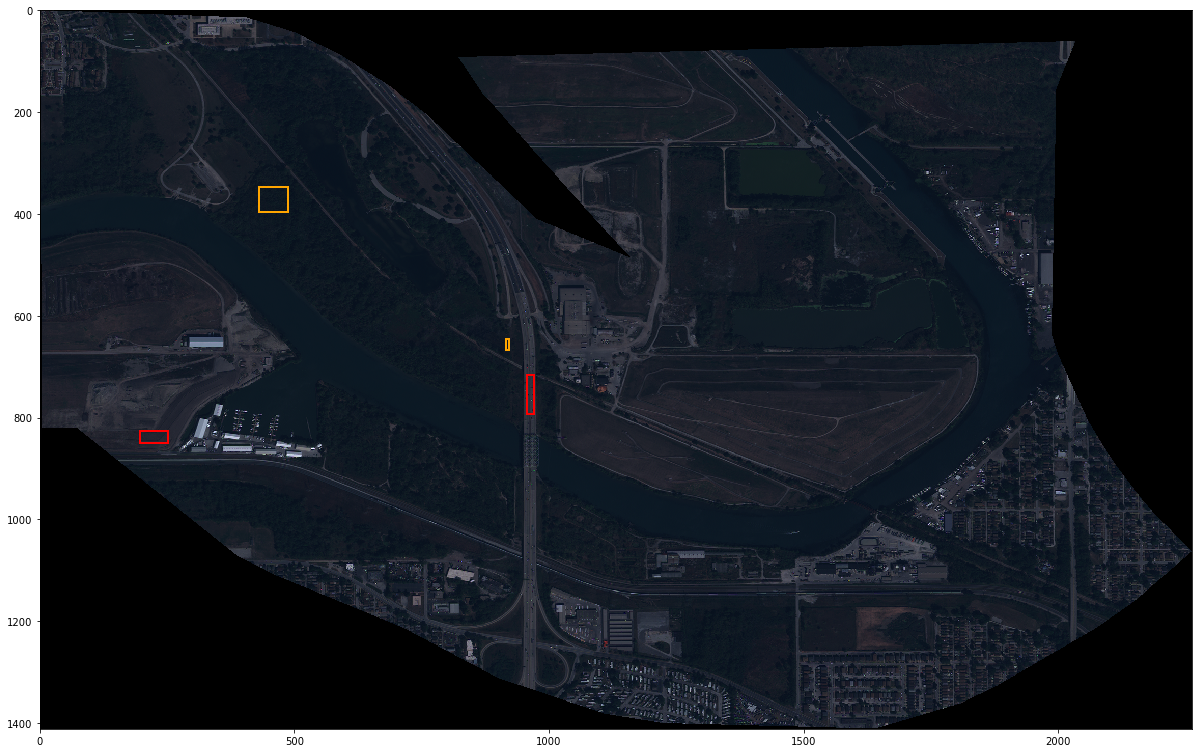

In [2]:
#[0] Beaubien Woods
fname = 'Delivery/057773250120_01/057773250120_01_P004_MUL/17SEP29170130-M2AS-057773250120_01_P004.TIF'
scan = PhScan(fname)
nrow, ncol = scan.rgb.shape[:2]
xsize = 16.
ysize = xsize * float(nrow) / float(ncol)

fig0, ax0 = plt.subplots(num=0, figsize=[xsize, ysize])
fig0.subplots_adjust(0, 0, 1, 1)
# ax0.grid("off")
# im1 = ax0.imshow((2.0 * scan.rgb))
im1 = ax0.imshow((1.0 * scan.rgb).clip(0, 1))
prow = [646, 667]
pcol = [915, 922]
llp  = (pcol[0], prow[0])
widp = pcol[1] - pcol[0]
hgtp = prow[1] - prow[0]

# hrow = [168-50, 173]
# hcol = [490, 511]
hrow = [348, 396]
hcol = [430, 488]
llh  = (hcol[0], hrow[0])
widh = hcol[1] - hcol[0]
hgth = hrow[1] - hrow[0]


drow = [827, 850]
dcol = [197, 252]
rrow = [717, 794]
rcol = [957, 971]


ax0.add_patch(plt.Rectangle(llp, widp, hgtp, facecolor='none', 
                            edgecolor='orange', lw=2))
ax0.add_patch(plt.Rectangle(llh, widh, hgth, facecolor='none', 
                            edgecolor='orange', lw=2))
for reg in [[drow, dcol], [rrow, rcol]]:
    ax0.add_patch(plt.Rectangle((reg[1][0], reg[0][0]), 
                                reg[1][1] - reg[1][0], 
                                reg[0][1] - reg[0][0],
                  facecolor='none', edgecolor='red', lw=2))
    
fig0.canvas.draw()
plt.show()

In [3]:
img = scan.img.transpose(1, 2, 0)
# img = scan.imnorm
# img = scan.rgb

In [4]:
img.shape

(1412, 2263, 4)

In [5]:
blu, grn, red, nir = img.transpose(2, 0, 1)

In [6]:
stamp_ph = img[prow[0]:prow[1], pcol[0]:pcol[1]]
stamp_he = img[hrow[0]:hrow[1], hcol[0]:hcol[1]]

In [7]:
stamp_di = img[drow[0]:drow[1], dcol[0]:dcol[1]]
stamp_rd = img[rrow[0]:rrow[1], rcol[0]:rcol[1]]

In [8]:
img.shape

(1412, 2263, 4)

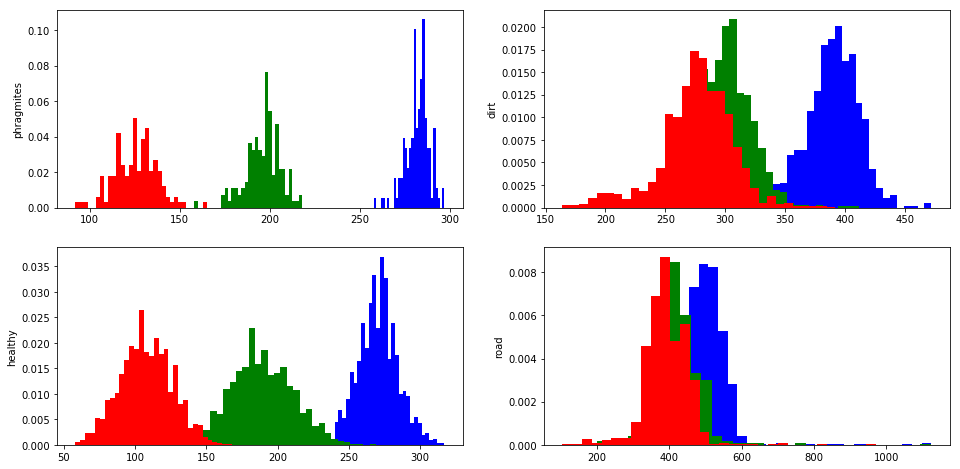

In [9]:
clrs = ["blue", "green", "red", "m"]
fig1, ax1 = plt.subplots(2, 2, num=1, figsize=[16, 8])

[ax1[0, 0].hist(stamp_ph[:, :, i].flatten(), bins=32, 
               normed=True, color=clrs[i]) for i in range(3)]
[ax1[1, 0].hist(stamp_he[:, :, i].flatten(), bins=32,
               normed=True, color=clrs[i]) for i in range(3)]
[ax1[0, 1].hist(stamp_di[:, :, i].flatten(), bins=32,
               normed=True, color=clrs[i]) for i in range(3)]
[ax1[1, 1].hist(stamp_rd[:, :, i].flatten(), bins=32,
               normed=True, color=clrs[i]) for i in range(3)]
# [i.set_yticklabels('') for j in ax1 for i in j]

ax1[0, 0].set_ylabel("phragmites")
ax1[1, 0].set_ylabel("healthy")
ax1[0, 1].set_ylabel("dirt")
ax1[1, 1].set_ylabel("road")
fig1.canvas.draw()